### Run this first

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])
style.use('seaborn-ticks')

import seaborn as sns
sns.set(color_codes=True)

import urllib.request
import json

### Importing Dataset

In [366]:
diamonds = sns.load_dataset('diamonds')
penguin = sns.load_dataset('penguins')
tips = sns.load_dataset('tips')
fmri = sns.load_dataset('fmri')
flights = sns.load_dataset('flights')
d = diamonds.copy()
p = penguin.copy()
t = tips.copy()
f = fmri.copy()
f1 = flights.copy()

In [8]:
#url = 'https://data.covid19india.org/states_daily.json'
#urllib.request.urlretrieve(url,'data.json')

In [283]:
with open('states_daily.json') as f:
    data = json.load(f)
data = data['states_daily']

In [284]:
#covid_data = pd.DataFrame(data)
covid_data = pd.json_normalize(data)
covid_data.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Recovered,1,0,0,4,0,0,0,0


In [8]:
df = covid_data.copy()
df.date = pd.to_datetime(df.date)

# Plotting the composition of data

## Static Composition

### Pie Chart

In [9]:
c = p.groupby('species')['species'].count()

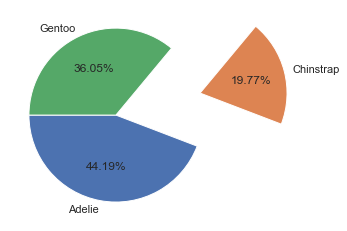

In [10]:
plt.pie(c,labels = c.index, autopct = "%.2f%%", explode = [0,1,0], startangle = 180)
plt.show()

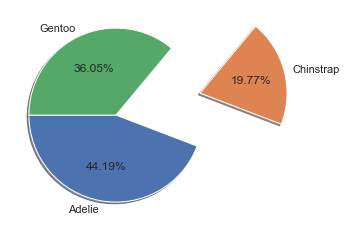

In [11]:
plt.pie(c,labels = c.index, autopct = "%.2f%%", explode = [0,1,0], startangle = 180, shadow = True)
plt.show()

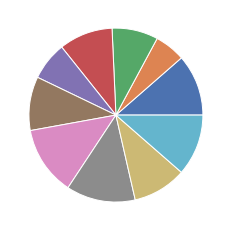

In [12]:
plt.pie(np.random.randint(0,10,10))
plt.show()

### Donut Chart

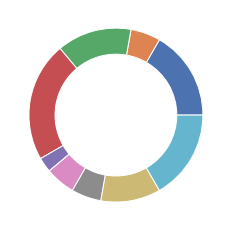

In [13]:
plt.pie(np.random.randint(0,10,10), wedgeprops = dict(width=0.3))
plt.show()

##### Chossing Color Maps - https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [14]:
cmap = plt.get_cmap('Dark2')
my_colors = cmap(np.arange(10))

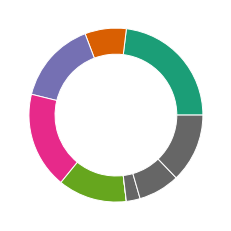

In [54]:
plt.pie(np.random.randint(0,10,10), wedgeprops = dict(width=0.3),colors=my_colors)
plt.show()

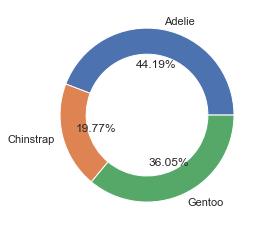

In [15]:
plt.pie(c,labels = c.index, autopct = "%.2f%%", wedgeprops = dict(width=0.3))
plt.show()

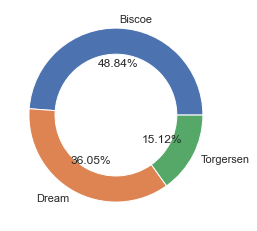

In [16]:
c_i = p.groupby('island')['island'].count()
plt.pie(c_i,labels = c_i.index, autopct = "%.2f%%", wedgeprops = dict(width=0.3))
plt.show()

##### Pandas Crosstab : A simple cross tabulation of two (or more) factors

In [17]:
c = pd.crosstab(p.species,p.island)
c = c.T
print(c)
print(c.sum(axis=1))

species    Adelie  Chinstrap  Gentoo
island                              
Biscoe         44          0     124
Dream          56         68       0
Torgersen      52          0       0
island
Biscoe       168
Dream        124
Torgersen     52
dtype: int64


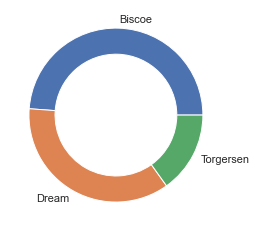

In [18]:
plt.pie(c.sum(axis=1),labels = c.index, radius = 1, wedgeprops = dict(width=0.3))
plt.show()

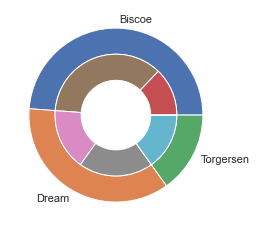

In [19]:
plt.pie(c.sum(axis=1),labels = c.index, radius = 1, wedgeprops = dict(width=0.3))
plt.pie(c.values.flatten(), radius=0.7,wedgeprops = dict(width=0.3))
plt.show()

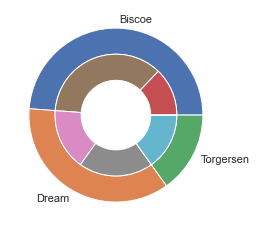

In [20]:
plt.pie(c.sum(axis=1),labels = c.index, radius = 1, wedgeprops = dict(width=0.3))
plt.pie(c.values.flatten(), radius=0.7,wedgeprops = dict(width=0.3))
plt.show()

In [21]:
cmap = plt.get_cmap('tab20c')
outer_colors = cmap(np.array([0,4,8]))
inner_color = cmap(np.array([1,2,3,5,6,7,9,10,11]))

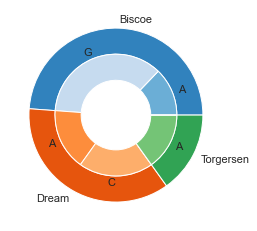

In [22]:
plt.pie(c.sum(axis=1),labels = c.index, radius = 1, wedgeprops = dict(width=0.3), colors = outer_colors)
plt.pie(c.values.flatten(), radius=0.7,wedgeprops = dict(width=0.3), colors = inner_color,
        labels = ['A','','G','A','C','','A','','']) # Some omitted because they have zero values
plt.show()

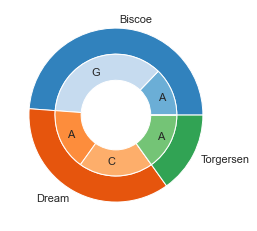

In [23]:
plt.pie(c.sum(axis=1),labels = c.index, radius = 1, wedgeprops = dict(width=0.3), colors = outer_colors)
plt.pie(c.values.flatten(), radius=0.7,wedgeprops = dict(width=0.3), colors = inner_color,
        labels = ['A','','G','A','C','','A','',''], labeldistance=0.75)
plt.show()

In [24]:
cmap = plt.get_cmap('tab20b')
outer_colors = cmap(np.array([0,4,8]))
inner_color = cmap(np.array([1,2,3,5,6,7,9,10,11]))

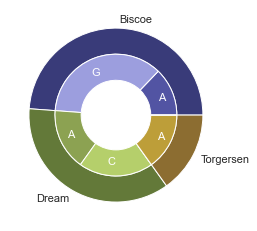

In [25]:
plt.pie(c.sum(axis=1),labels = c.index, radius = 1, wedgeprops = dict(width=0.3), colors = outer_colors)
plt.pie(c.values.flatten(), radius=0.7,wedgeprops = dict(width=0.3), colors = inner_color,
        labels = ['A','','G','A','C','','A','',''], labeldistance=0.75, textprops = dict(color='w'))
plt.show()

### Stacked Bar Plot

In [26]:
df.tail(3)

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
1560,1,909,165,758,14,2,68,2021-08-16,2021-08-16,0,...,20,Confirmed,405,1851,52,24696,0,17,18,502
1561,0,1543,249,1014,42,3,224,2021-08-16,2021-08-16,0,...,147,Recovered,577,1911,223,36871,0,36,54,691
1562,0,13,0,10,0,0,1,2021-08-16,2021-08-16,0,...,0,Deceased,3,28,1,438,0,1,1,9


In [28]:
df_ = df.tail(3)
df_.drop('date',axis=1,inplace=True)
df_.drop('dateymd',axis=1,inplace=True)
df_.set_index('status',inplace=True)
df_ = df_.T
df_ = df_.apply(pd.to_numeric)
df_.drop('tt',inplace=True) # Dropping total column

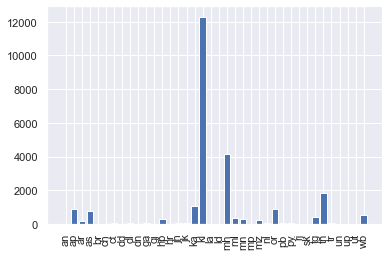

In [29]:
plt.bar(df_.index,df_.Confirmed)
plt.xticks(rotation=90)
plt.show()

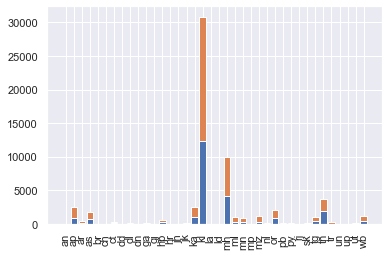

In [30]:
plt.bar(df_.index,df_.Confirmed)
plt.bar(df_.index,df_.Recovered, bottom=df_.Confirmed)
plt.xticks(rotation=90)
plt.show()

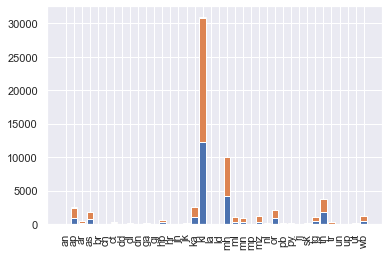

In [31]:
plt.bar(df_.index,df_.Confirmed)
plt.bar(df_.index,df_.Recovered, bottom=df_.Confirmed)
plt.bar(df_.index,df_.Deceased, bottom=df_.Confirmed + df_.Recovered)
plt.xticks(rotation=90)
plt.show()

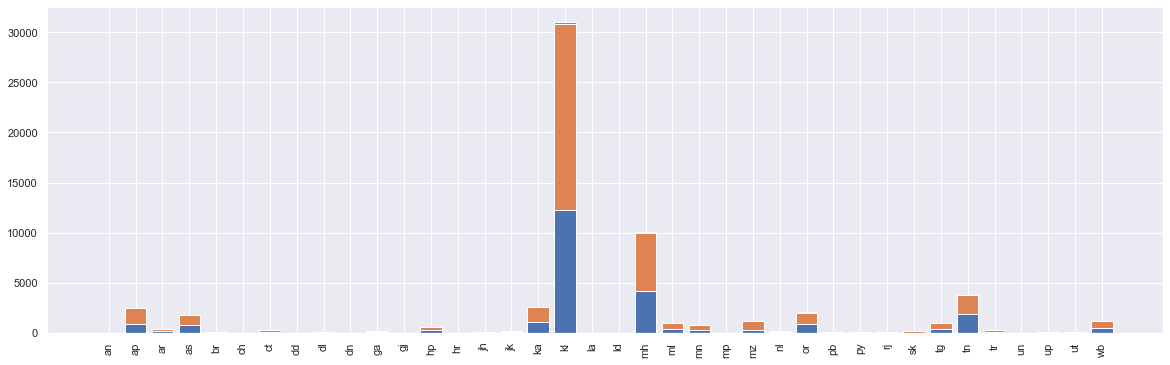

In [32]:
fig =  plt.gcf()
fig.set_size_inches(20,6)
plt.bar(df_.index,df_.Confirmed)
plt.bar(df_.index,df_.Recovered, bottom=df_.Confirmed)
plt.bar(df_.index,df_.Deceased, bottom=df_.Confirmed + df_.Recovered)
plt.xticks(rotation=90)
plt.show()

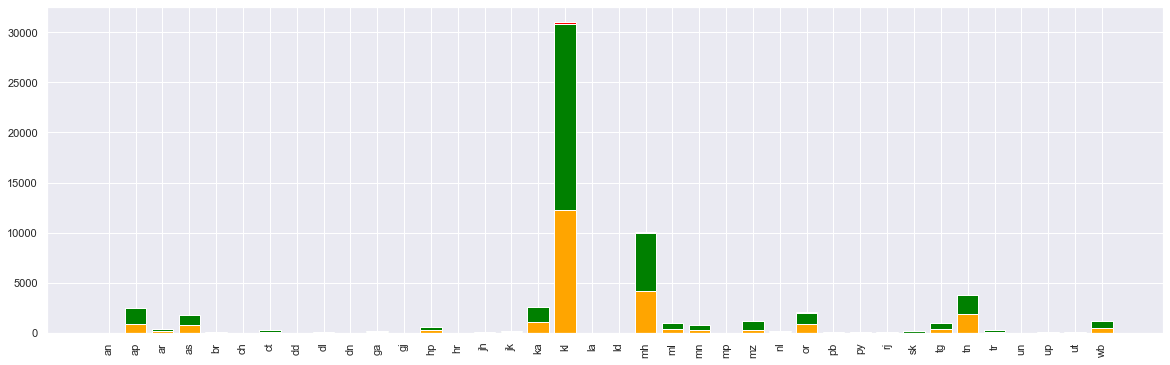

In [33]:
fig =  plt.gcf()
fig.set_size_inches(20,6)
plt.bar(df_.index,df_.Confirmed, color = 'orange')
plt.bar(df_.index,df_.Recovered, bottom=df_.Confirmed, color = 'green')
plt.bar(df_.index,df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color = 'red')
plt.xticks(rotation=90)
plt.show()

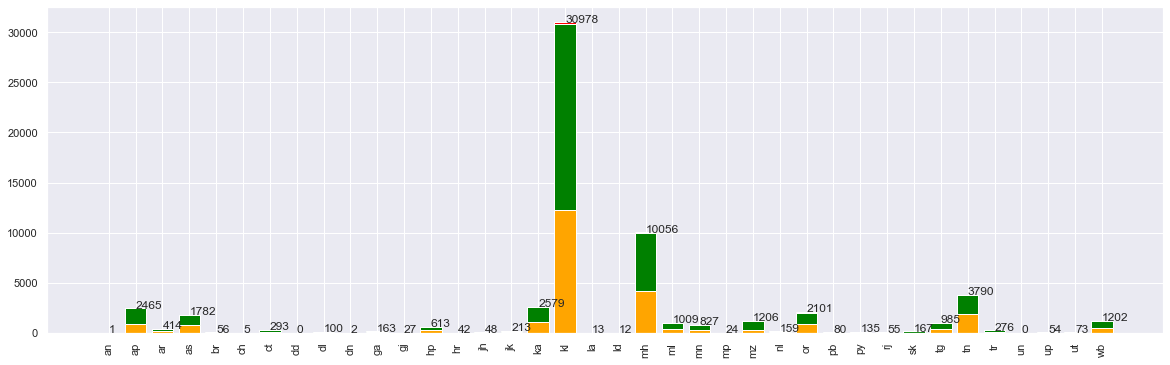

In [200]:
fig =  plt.gcf()
fig.set_size_inches(20,6)
plt.bar(df_.index,df_.Confirmed, color = 'orange')
plt.bar(df_.index,df_.Recovered, bottom=df_.Confirmed, color = 'green')
plt.bar(df_.index,df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color = 'red')
plt.xticks(rotation=90)

for i,val in enumerate(df_.index):
    y = df_.loc[val].sum()
    x = i
    plt.text(x,y,str(y))
    
plt.show()

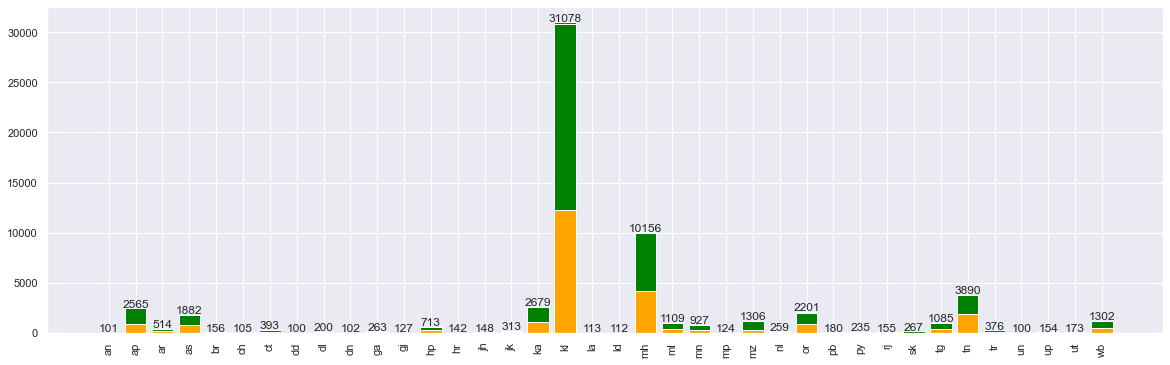

In [34]:
fig =  plt.gcf()
fig.set_size_inches(20,6)
plt.bar(df_.index,df_.Confirmed, color = 'orange')
plt.bar(df_.index,df_.Recovered, bottom=df_.Confirmed, color = 'green')
plt.bar(df_.index,df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color = 'red')
plt.xticks(rotation=90)

for i,val in enumerate(df_.index):
    y = df_.loc[val].sum() + 100
    x = i
    plt.text(x,y,str(y), ha='center')
    
plt.show()

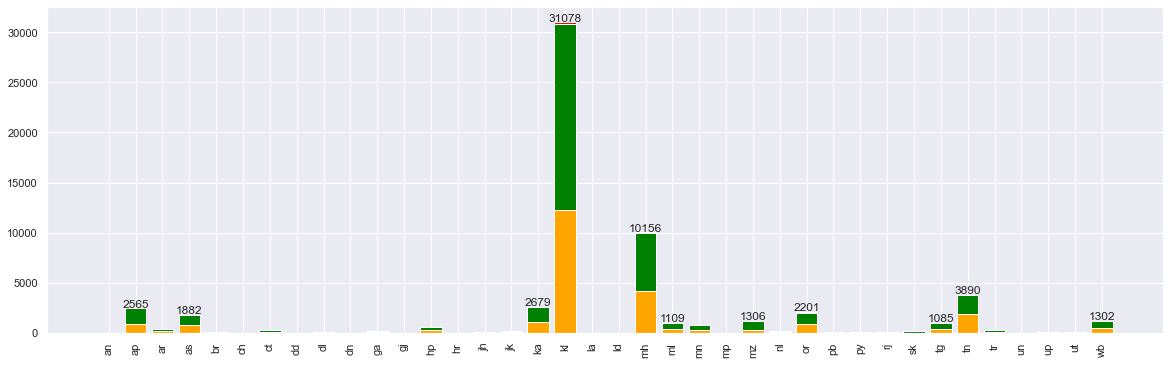

In [35]:
fig =  plt.gcf()
fig.set_size_inches(20,6)
plt.bar(df_.index,df_.Confirmed, color = 'orange')
plt.bar(df_.index,df_.Recovered, bottom=df_.Confirmed, color = 'green')
plt.bar(df_.index,df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color = 'red')
plt.xticks(rotation=90)

for i,val in enumerate(df_.index):
    y = df_.loc[val].sum() + 100
    x = i
    if y > 1000:
        plt.text(x,y,str(y), ha='center')
    
plt.show()

### Relative Stacked Bar Plot

In [36]:
df_ = df.tail(3)
df_.drop('date',axis=1,inplace=True)
df_.drop('dateymd',axis=1,inplace=True)
df_.set_index('status',inplace=True)
df_ = df_.T
df_ = df_.apply(pd.to_numeric)
df_.drop('tt',inplace=True) # Dropping total column

In [37]:
df_['Total'] = df_.sum(axis=1)
df_['ConfirmedFraction'] = df_.Confirmed/df_.Total
df_['RecoveredFraction'] = df_.Recovered/df_.Total
df_['DeceasedFraction'] = df_.Deceased/df_.Total
df_.tail()

status,Confirmed,Recovered,Deceased,Total,ConfirmedFraction,RecoveredFraction,DeceasedFraction
tr,52,223,1,276,0.188406,0.807971,0.003623
un,0,0,0,0,NaN,NaN,NaN
up,17,36,1,54,0.314815,0.666667,0.018519
ut,18,54,1,73,0.246575,0.739726,0.013699
wb,502,691,9,1202,0.417637,0.574875,0.007488


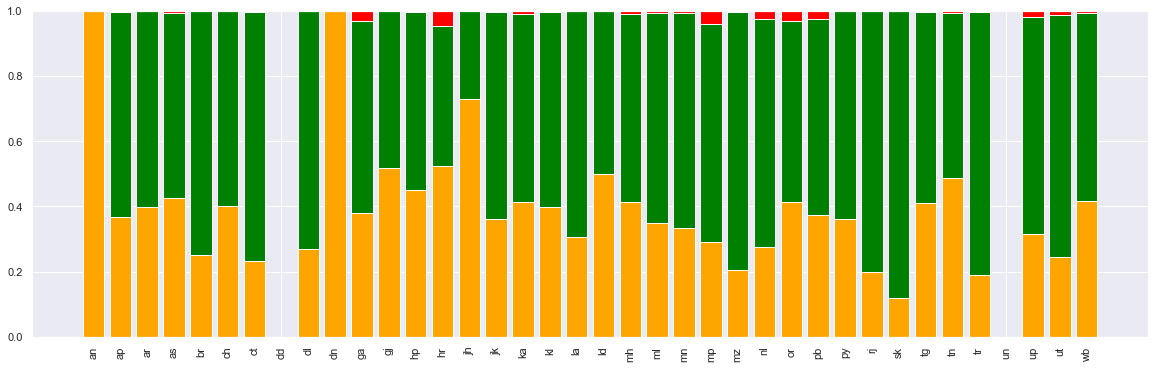

In [38]:
fig =  plt.gcf()
fig.set_size_inches(20,6)
plt.bar(df_.index,df_.ConfirmedFraction, color = 'orange')
plt.bar(df_.index,df_.RecoveredFraction, bottom=df_.ConfirmedFraction, color = 'green')
plt.bar(df_.index,df_.DeceasedFraction, bottom=df_.ConfirmedFraction + df_.RecoveredFraction, color = 'red')
plt.xticks(rotation=90)
plt.show()

In [39]:
df_ = df_.sort_values('ConfirmedFraction',ascending=False)

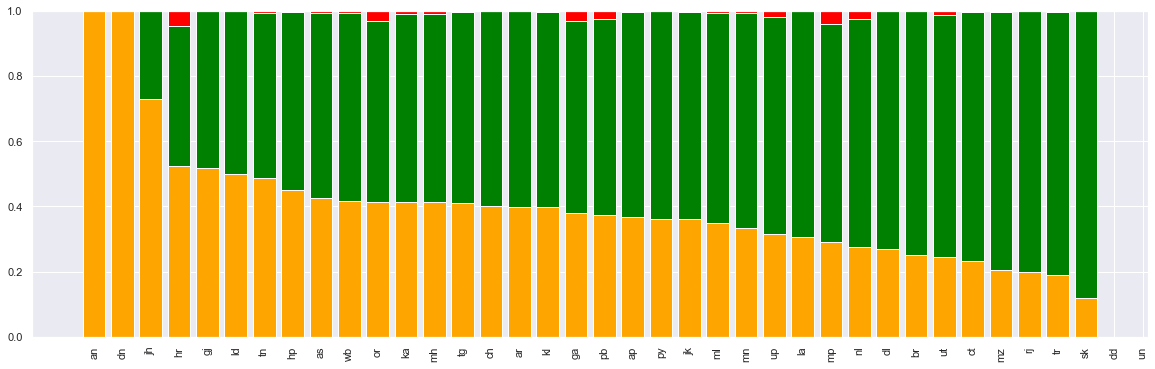

In [40]:
fig =  plt.gcf()
fig.set_size_inches(20,6)
plt.bar(df_.index,df_.ConfirmedFraction, color = 'orange')
plt.bar(df_.index,df_.RecoveredFraction, bottom=df_.ConfirmedFraction, color = 'green')
plt.bar(df_.index,df_.DeceasedFraction, bottom=df_.ConfirmedFraction + df_.RecoveredFraction, color = 'red')
plt.xticks(rotation=90)
plt.show()

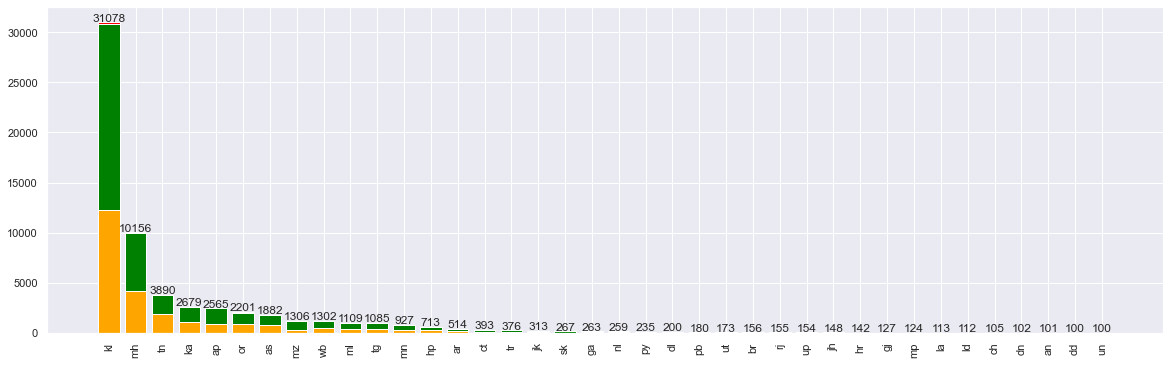

In [41]:
df_ = df_.sort_values('Total',ascending=False)

fig =  plt.gcf()
fig.set_size_inches(20,6)
plt.bar(df_.index,df_.Confirmed, color = 'orange')
plt.bar(df_.index,df_.Recovered, bottom=df_.Confirmed, color = 'green')
plt.bar(df_.index,df_.Deceased, bottom=df_.Confirmed + df_.Recovered, color = 'red')
plt.xticks(rotation=90)

for i,val in enumerate(df_.index):
    y = df_.loc[val,'Total'] + 100
    x = i
    plt.text(x,y,str(y), ha='center')
    
plt.show()

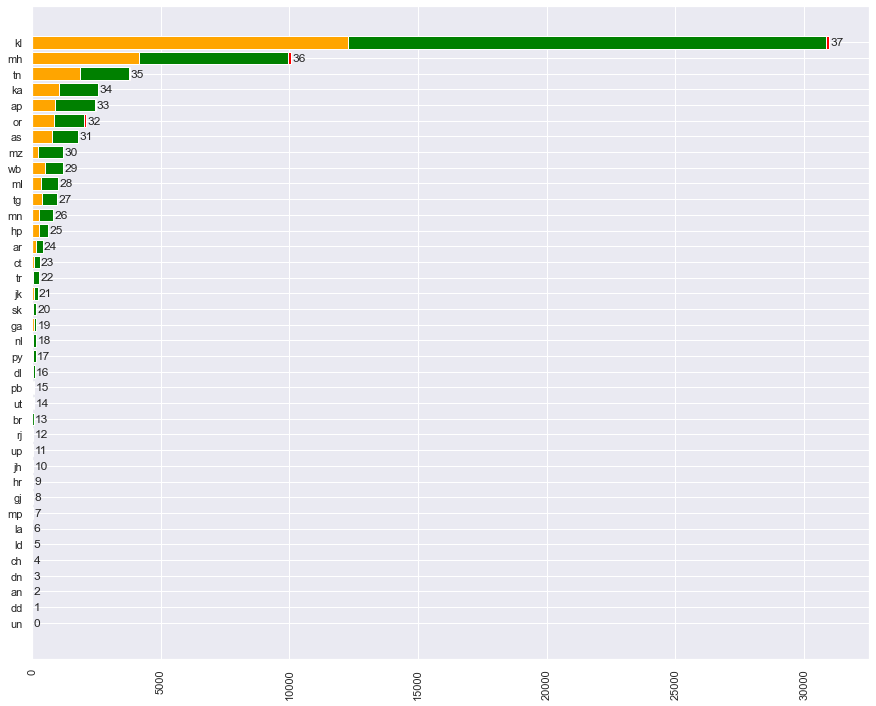

In [42]:
df_ = df_.sort_values('Total',ascending=True)

fig =  plt.gcf()
fig.set_size_inches(15,12)
plt.barh(df_.index,df_.Confirmed, color = 'orange')
plt.barh(df_.index,df_.Recovered, left=df_.Confirmed, color = 'green')
plt.barh(df_.index,df_.Deceased, left=df_.Confirmed + df_.Recovered, color = 'red')
plt.xticks(rotation=90)

for i,val in enumerate(df_.index):
    x = df_.loc[val,'Total'] + 50
    y = i
    plt.text(x,y,str(y), va='center')
    
plt.show()

## Time - Varying Composition of Data

###  Stacked Area Plots

In [43]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,2020-03-14,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,2020-03-14,2020-03-14,0,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,2020-03-14,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,2020-03-15,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,2020-03-15,2020-03-15,0,...,0,Recovered,1,0,0,4,0,0,0,0


In [70]:
df_m = df[['mh','date','status']]

In [71]:
df_m['mh'] = df_m['mh'].apply(pd.to_numeric)
df_m['date'] = pd.to_datetime(df_m['date'])

<ipython-input-71-b43131390c9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['mh'] = df_m['mh'].apply(pd.to_numeric)
<ipython-input-71-b43131390c9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['date'] = pd.to_datetime(df_m['date'])


In [58]:
# Should be in this format
# date | confirmed | recovered | deceased
# 2020-03-21 | 14 | 0 | 0

In [72]:
df_m.head()

,mh,date,status
0,14,2020-03-14,Confirmed
1,0,2020-03-14,Recovered
2,0,2020-03-14,Deceased
3,18,2020-03-15,Confirmed
4,0,2020-03-15,Recovered


##### Pivot in pandas

In [73]:
df_m = df_m.pivot_table(values='mh',columns='status',index='date')

In [293]:
df_m.head()

status,Confirmed,Deceased,Recovered
date,,,
2020-03-14,14,0,0
2020-03-15,18,0,0
2020-03-16,6,0,0
2020-03-17,3,1,0
2020-03-18,3,0,0


In [89]:
df_m.loc['2020-12-16']['Confirmed'] = 5914

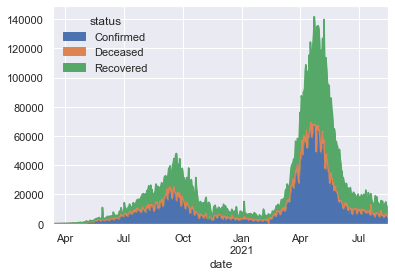

In [97]:
df_m.plot.area()
plt.show()

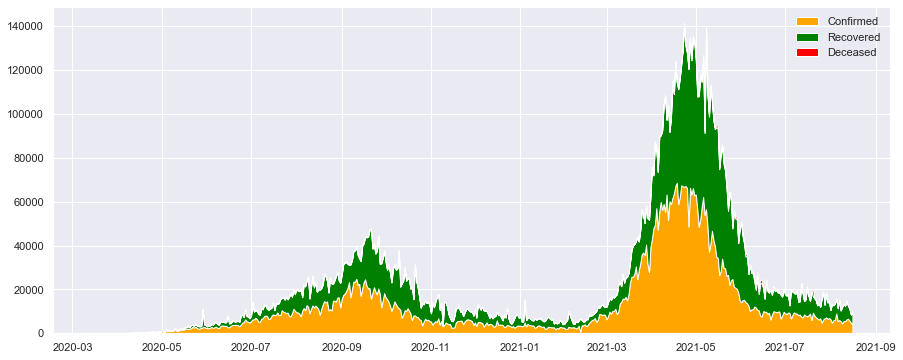

In [104]:
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.stackplot(df_m.index,df_m.Confirmed,df_m.Recovered,df_m.Deceased,colors=['Orange','Green','Red'],labels=['Confirmed','Recovered','Deceased'])
plt.legend()
plt.show()

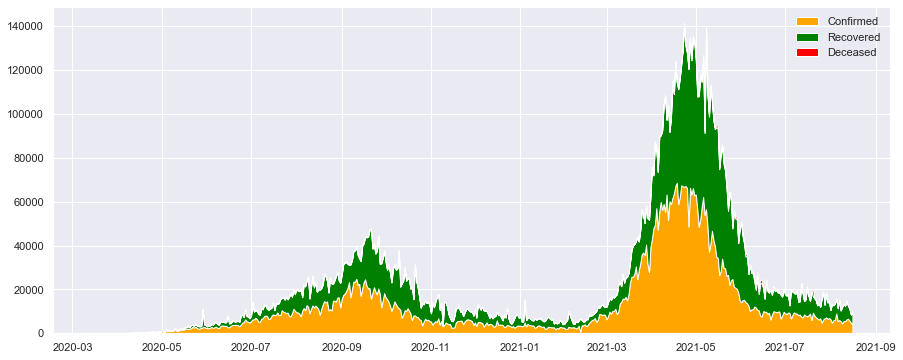

In [105]:
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.stackplot(df_m.index,df_m.Confirmed,df_m.Recovered,df_m.Deceased,colors=['Orange','Green','Red'])
plt.legend(['Confirmed','Recovered','Deceased'])
plt.show()

###  Relative Stacked Area Plots

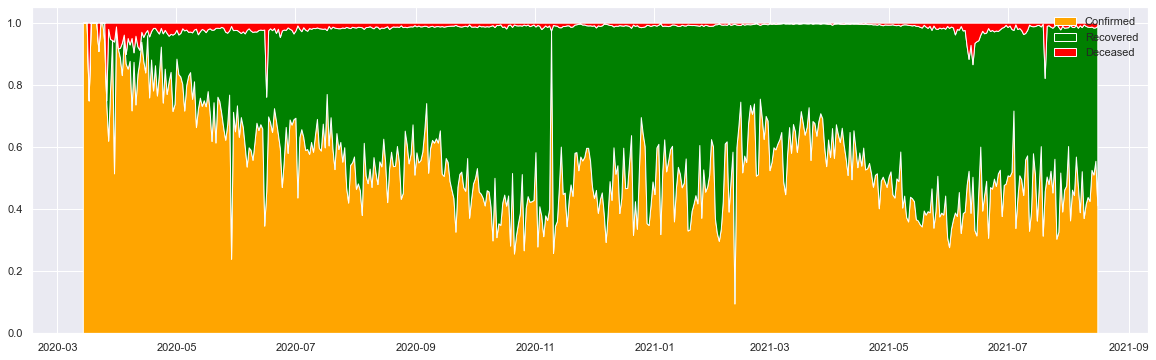

In [108]:
fig = plt.gcf()
fig.set_size_inches(20,6)
plt.stackplot(df_m.index,df_m.Confirmed/df_m.sum(axis=1),df_m.Recovered/df_m.sum(axis=1),df_m.Deceased/df_m.sum(axis=1),colors=['Orange','Green','Red'])
plt.legend(['Confirmed','Recovered','Deceased'])
plt.show()

In [150]:
def plot_stacked_area_by_state(state):
    df_ = df[[state,'date','status']]
    df_.loc[:,state] = pd.to_numeric(df_[state])
    df_.loc[:,'date'] = pd.to_datetime(df_.loc[:,'date'])
    df_ = df_.pivot_table(values=state,index='date',columns='status')
    
    fig = plt.gcf()
    fig.set_size_inches(20,6)
    plt.stackplot(df_m.index,df_m.Confirmed/df_m.sum(axis=1),df_m.Recovered/df_m.sum(axis=1),df_m.Deceased/df_m.sum(axis=1),colors=['Orange','Green','Red'])
    plt.legend(['Confirmed','Recovered','Deceased'])
    plt.show()

C:\Users\malla\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


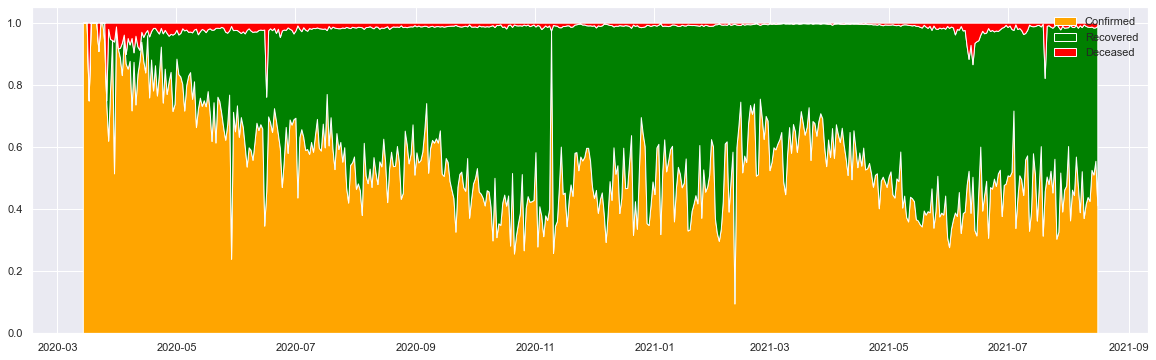

In [152]:
plot_stacked_area_by_state('tn')

# Plotting relationships between data

## Scatter Plot

In [155]:
t.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


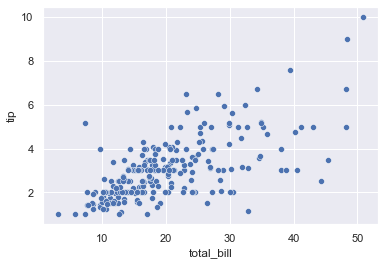

In [160]:
sns.scatterplot('total_bill', 'tip', data=t)
plt.show()

In [161]:
t['tip_fraction'] = t['tip']/t['total_bill']

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


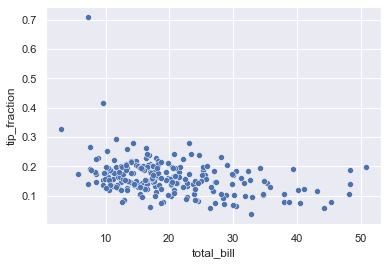

In [162]:
sns.scatterplot('total_bill', 'tip_fraction', data=t)
plt.show()

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


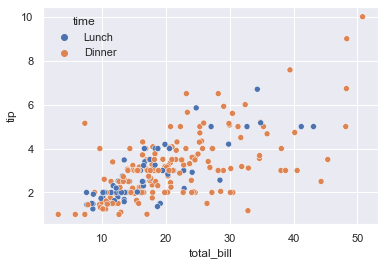

In [182]:
sns.scatterplot('total_bill', 'tip', data=t, hue='time')
plt.show()

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


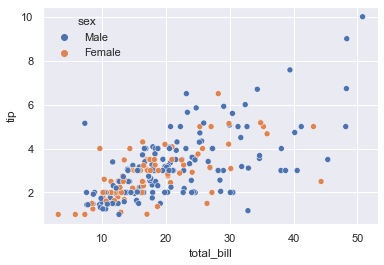

In [181]:
sns.scatterplot('total_bill', 'tip', data=t, hue='sex')
plt.show()

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


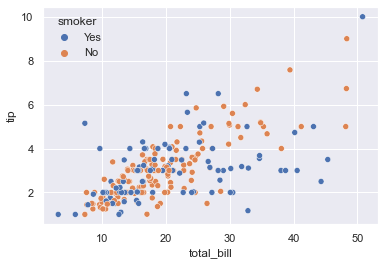

In [180]:
sns.scatterplot('total_bill', 'tip', data=t, hue='smoker')
plt.show()

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


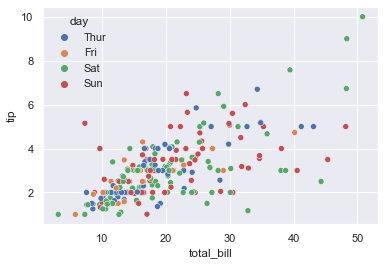

In [179]:
sns.scatterplot('total_bill', 'tip', data=t, hue='day')
plt.show()

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


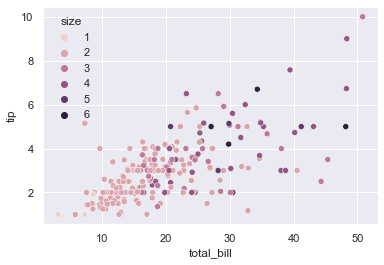

In [178]:
sns.scatterplot('total_bill', 'tip', data=t, hue='size')
plt.show()

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


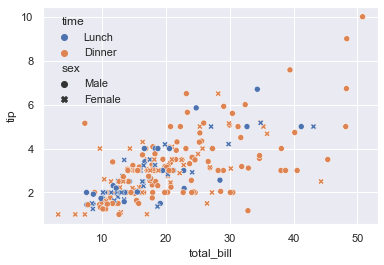

In [177]:
sns.scatterplot('total_bill', 'tip', data=t, hue='time', style='sex')
plt.show()

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


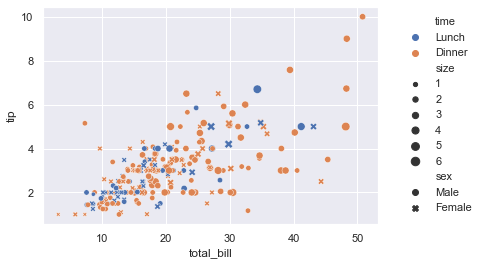

In [187]:
sns.scatterplot('total_bill', 'tip', data=t, hue='time', style='sex', size='size')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

### Reg Plot

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


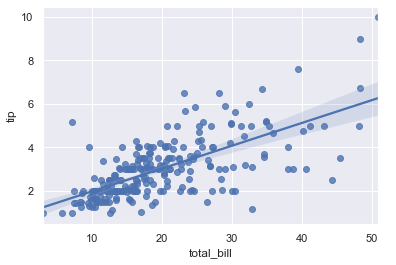

In [190]:
sns.regplot('total_bill', 'tip', data=t)
plt.legend(bbox_to_anchor=(1.05,1))
plt.show() 

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


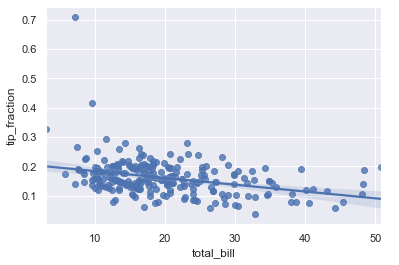

In [192]:
sns.regplot('total_bill', 'tip_fraction', data=t)
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


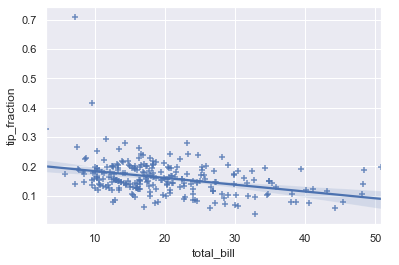

In [193]:
sns.regplot('total_bill', 'tip_fraction', data=t, marker='+')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

In [194]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


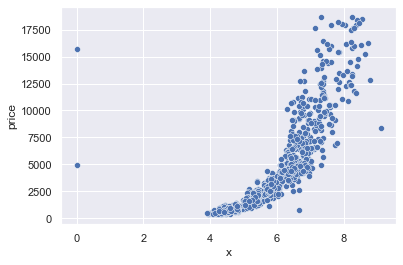

In [200]:
sns.scatterplot('x', 'price', data=d.sample(1000))
plt.show()

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


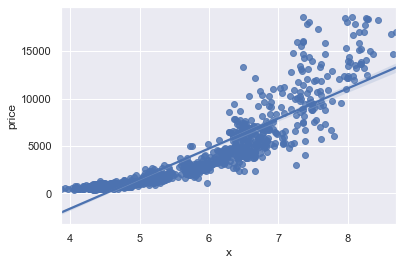

In [201]:
sns.regplot('x', 'price', data=d.sample(1000))
plt.show()

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


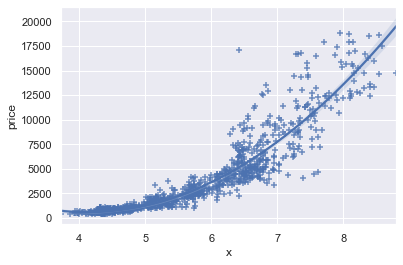

In [205]:
sns.regplot('x', 'price', data=d.sample(1000), order=2, marker='+') # for specifying the order of the line/polynimial
plt.show()

## Bar Plot

#### For relationship between continous vs categorical variable

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


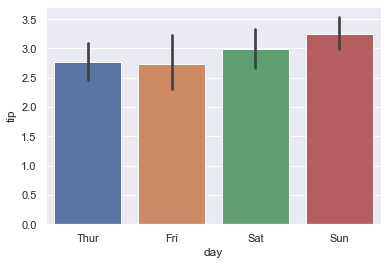

In [215]:
sns.barplot('day','tip',data=t)
plt.show()

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


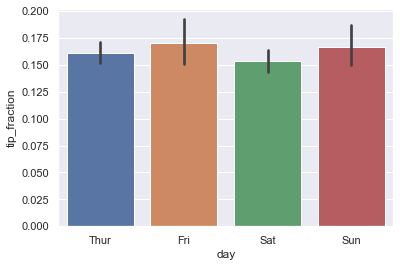

In [208]:
sns.barplot('day','tip_fraction',data=t)
plt.show()

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


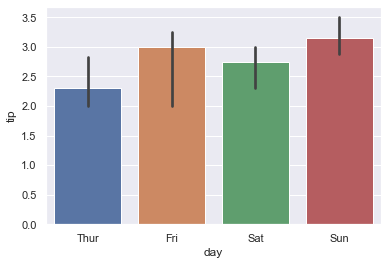

In [220]:
sns.barplot('day','tip',data=t, estimator=np.median)
plt.show()

In [227]:
def my_estimate(v):
    return np.quantile(v,0.25)

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


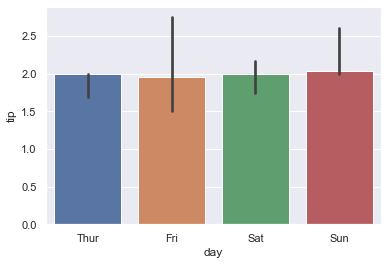

In [231]:
sns.barplot('day','tip',data=t, estimator=my_estimate)
plt.show()

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


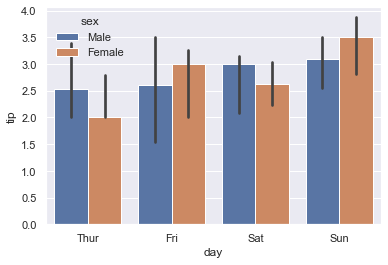

In [234]:
sns.barplot('day','tip',data=t, hue='sex', estimator=np.median)
plt.show()

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


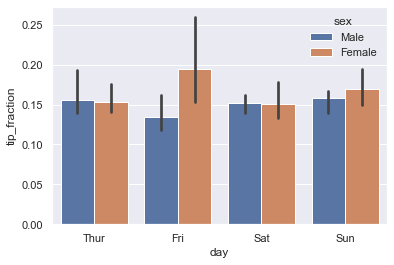

In [235]:
sns.barplot('day','tip_fraction',data=t, hue='sex', estimator=np.median)
plt.show()

In [236]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Continous vs Continous Plot

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='price'>

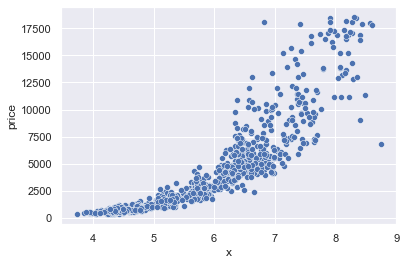

In [238]:
sns.scatterplot('x','price',data=d.sample(1000))

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='price'>

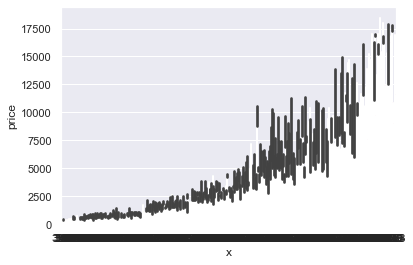

In [239]:
sns.barplot('x','price',data=d.sample(1000))

In [247]:
d['x_q'] = pd.cut(d['x'],bins=15)

In [248]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,x_q
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,"(3.58, 4.296]"
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"(3.58, 4.296]"
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,"(3.58, 4.296]"
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"(3.58, 4.296]"
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"(4.296, 5.012]"


In [249]:
d['x_q'].unique()

[(3.58, 4.296], (4.296, 5.012], (5.012, 5.728], (6.444, 7.16], (5.728, 6.444], ..., (-0.0107, 0.716], (7.876, 8.592], (8.592, 9.308], (9.308, 10.024], (10.024, 10.74]]
Length: 11
Categories (11, interval[float64]): [(-0.0107, 0.716] < (3.58, 4.296] < (4.296, 5.012] < (5.012, 5.728] ... (7.876, 8.592] < (8.592, 9.308] < (9.308, 10.024] < (10.024, 10.74]]

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x_q', ylabel='price'>

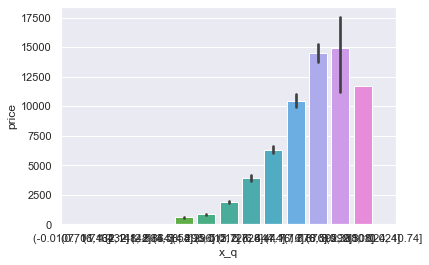

In [250]:
sns.barplot('x_q','price',data=d.sample(1000))

In [254]:
d['x_q'] = pd.cut(d['x'],bins=15, labels=False)

In [255]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,x_q
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,6


C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x_q', ylabel='price'>

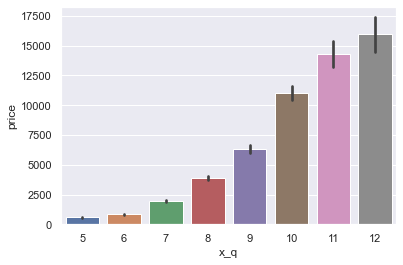

In [256]:
sns.barplot('x_q','price',data=d.sample(1000))

## Line Plot

In [260]:
f.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


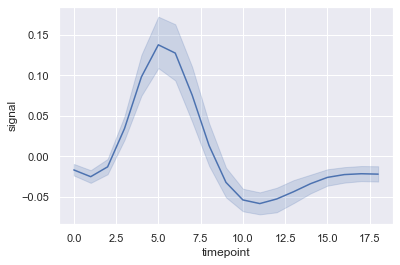

In [262]:
sns.lineplot('timepoint', 'signal', data=f)
plt.show()

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


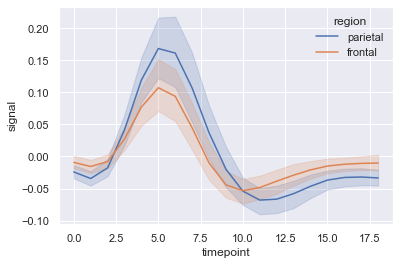

In [263]:
sns.lineplot('timepoint', 'signal', hue='region', data=f)
plt.show()

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


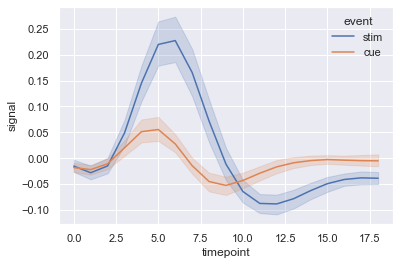

In [264]:
sns.lineplot('timepoint', 'signal', hue='event', data=f)
plt.show()

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


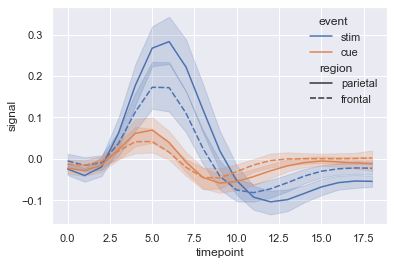

In [266]:
sns.lineplot('timepoint', 'signal', hue='event', style='region', data=f)
plt.show()

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


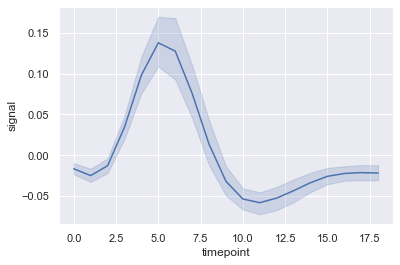

In [268]:
sns.lineplot('timepoint', 'signal', data=f, markers=True)
plt.show()

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


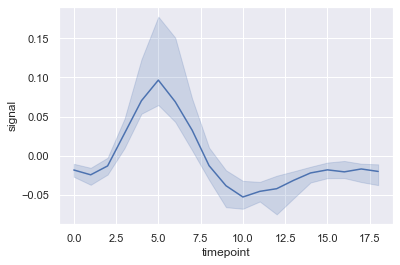

In [269]:
sns.lineplot('timepoint', 'signal', data=f, markers=True, estimator=np.median)
plt.show()

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


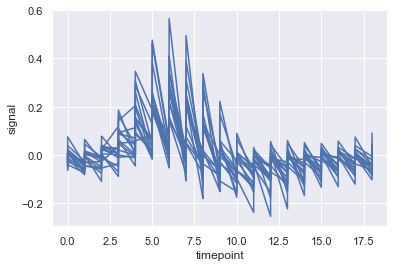

In [271]:
sns.lineplot('timepoint', 'signal', data=f, units='subject', estimator=None)
plt.show()

In [273]:
f_ = f[(f.region == 'parietal') & (f.event == 'cue')]

In [274]:
f_.head()

,subject,timepoint,event,region,signal
532,s3,4,cue,parietal,0.058219
533,s6,5,cue,parietal,0.038145
534,s7,5,cue,parietal,-0.008158
535,s8,5,cue,parietal,0.047136
536,s9,5,cue,parietal,0.055847


C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


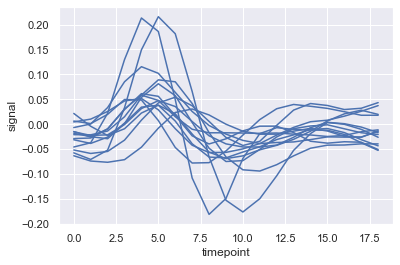

In [275]:
sns.lineplot('timepoint', 'signal', data=f_, units='subject', estimator=None)
plt.show()

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


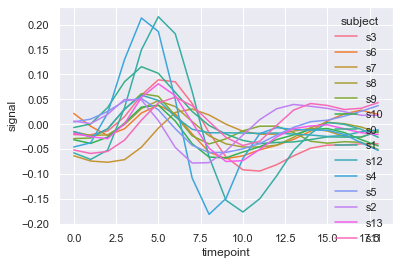

In [277]:
sns.lineplot('timepoint', 'signal', data=f_, hue='subject')
plt.show()

In [279]:
x = np.array([-3,-2,-1,0,1,2,3])

In [280]:
y = x*x

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


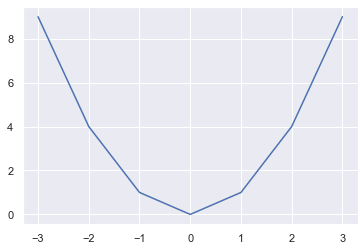

In [282]:
sns.lineplot(x,y)
plt.show()

### Line Plot - Covid Data

In [286]:
with open('states_daily.json') as f:
    data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)
df['date'] = pd.to_datetime(df['date'])
df.drop(['tt','dateymd'], axis=1, inplace=True)
df.set_index('date',inplace=True)
df = df[df['status'] == 'Confirmed']
df.drop('status', axis=1, inplace=True)
df = df.apply(pd.to_numeric)
df.reset_index(inplace=True)

In [288]:
df.head()

,date,an,ap,ar,as,br,ch,ct,dd,dl,...,py,rj,sk,tg,tn,tr,un,up,ut,wb
0,2020-03-14,0,1,0,0,0,0,0,0,7,...,0,3,0,1,1,0,0,12,0,0
1,2020-03-15,0,0,0,0,0,0,0,0,0,...,0,1,0,2,0,0,0,1,0,0
2,2020-03-16,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3,2020-03-17,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,2,0,1
4,2020-03-18,0,0,0,0,0,0,0,0,2,...,0,3,0,8,1,0,0,2,1,0


In [292]:
# date | state | confirmed
# 2020-03-14 | an | 0

In [301]:
df_ = pd.melt(df, id_vars='date',value_vars=list(df.columns).remove('date'), var_name='state', value_name='confirmed')
df_.head()

,date,state,confirmed
0,2020-03-14,an,0
1,2020-03-15,an,0
2,2020-03-16,an,0
3,2020-03-17,an,0
4,2020-03-18,an,0


C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


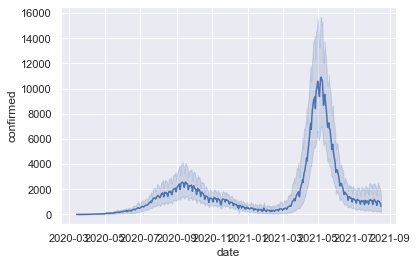

In [305]:
sns.lineplot('date','confirmed',data=df_)
plt.show()

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


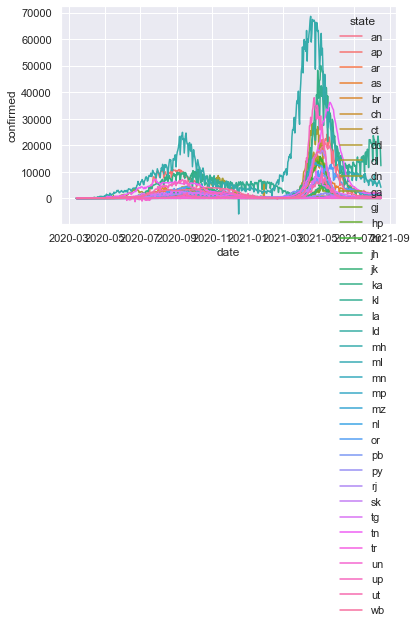

In [306]:
sns.lineplot('date','confirmed', hue='state', data=df_)
plt.show()

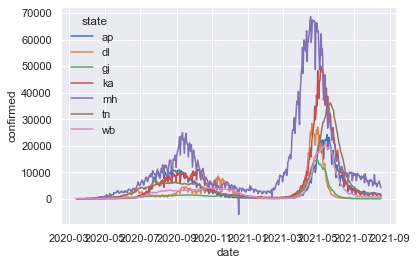

In [314]:
state = ['mh','tn','dl','wb','ka','ap','gj']
df_ = df_[df_.state.isin(state)]
sns.lineplot('date','confirmed', hue='state', data=df_)
plt.show()

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


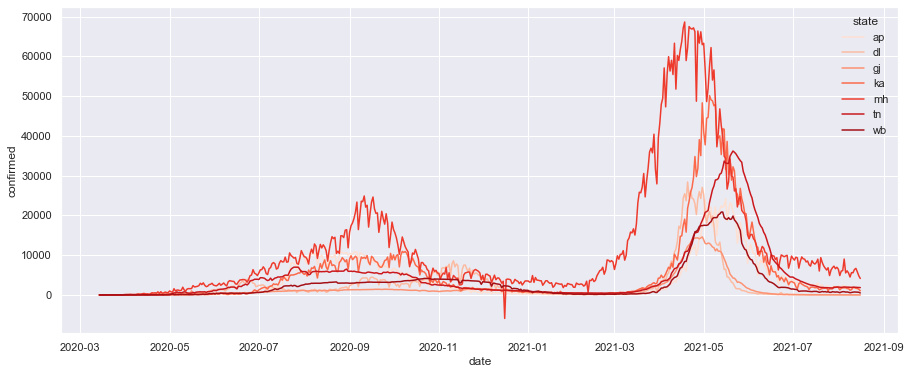

In [318]:
fig = plt.gcf()
fig.set_size_inches(15,6)
sns.lineplot('date','confirmed', hue='state', data=df_, palette='Reds')
plt.show()

C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


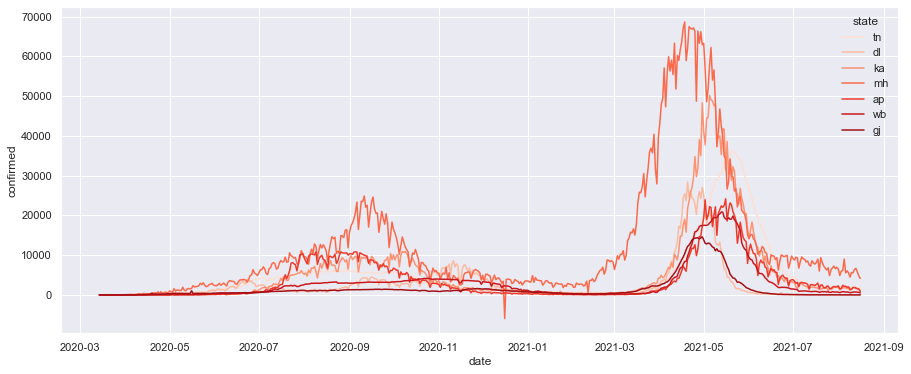

In [322]:
fig = plt.gcf()
fig.set_size_inches(15,6)
sns.lineplot('date','confirmed', hue='state', data=df_, palette='Reds', hue_order=['tn','dl','ka','mh','ap','wb','gj'])
plt.show()

In [340]:
with open('states_daily.json') as f:
    data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)
df['date'] = pd.to_datetime(df['date'])
df.drop(['tt','dateymd'], axis=1, inplace=True)
df.set_index('date',inplace=True)
df = df[df['status'] == 'Confirmed']
df.drop('status', axis=1, inplace=True)
df = df.apply(pd.to_numeric)

df = df.rolling(7).mean()

df.reset_index(inplace=True)

df_ = pd.melt(df, id_vars='date',value_vars=list(df.columns).remove('date'), var_name='state', value_name='confirmed')
state = ['mh','tn','dl','wb','ka','ap','gj']
df_ = df_[df_.state.isin(state)]
df_.head()

,date,state,confirmed
521,2020-03-14,ap,NaN
522,2020-03-15,ap,NaN
523,2020-03-16,ap,NaN
524,2020-03-17,ap,NaN
525,2020-03-18,ap,NaN


C:\Users\malla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


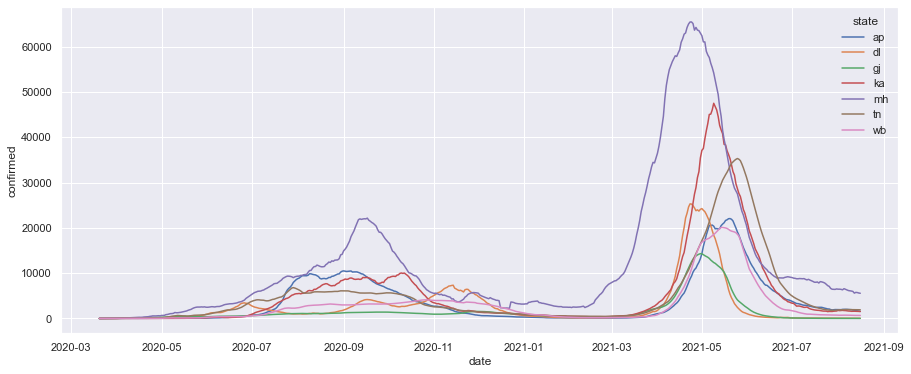

In [341]:
fig = plt.gcf()
fig.set_size_inches(15,6)
sns.lineplot('date','confirmed', hue='state', data=df_)
plt.show()

## Heat Map

### Discrete variable on both the axis

##### X [10 x 10]
##### X(i,j) -> value

In [344]:
x = np.random.rand(10,10)
x

array([[0.9822243 , 0.11215019, 0.66690638, 0.07682341, 0.79300177,
        0.64833203, 0.78937121, 0.33006049, 0.01231225, 0.32721688],
       [0.30645136, 0.88397044, 0.43898756, 0.02307733, 0.96928143,
        0.29601262, 0.03370746, 0.70995129, 0.44339207, 0.99191746],
       [0.4454879 , 0.30804354, 0.85663528, 0.81973478, 0.0603281 ,
        0.42359346, 0.80509113, 0.51802199, 0.95010915, 0.10937587],
       [0.673565  , 0.04862312, 0.7635702 , 0.6373639 , 0.64777985,
        0.17594012, 0.2749809 , 0.89802161, 0.93242281, 0.46278028],
       [0.26452593, 0.11960701, 0.31314062, 0.54037946, 0.48756405,
        0.10920486, 0.18246392, 0.72889958, 0.32276658, 0.22496885],
       [0.20696201, 0.49030404, 0.33469195, 0.5523515 , 0.22177262,
        0.76011253, 0.76448672, 0.8519859 , 0.74736751, 0.53080875],
       [0.42331754, 0.45484267, 0.37920883, 0.25858111, 0.35915724,
        0.96504888, 0.55612913, 0.81984526, 0.8811891 , 0.38433009],
       [0.33896331, 0.91158484, 0.6016467

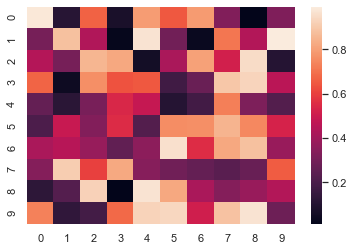

In [347]:
sns.heatmap(x)
plt.show()

In [361]:
f1.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
# year months 
# 1999 Jan Feb March

In [367]:
f1_ = f1.pivot(index='year',columns='month',values='passengers')
f1_.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


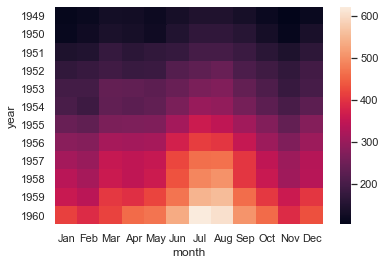

In [369]:
sns.heatmap(f1_)
plt.show()

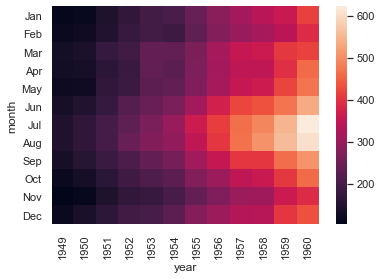

In [370]:
sns.heatmap(f1_.T)
plt.show()

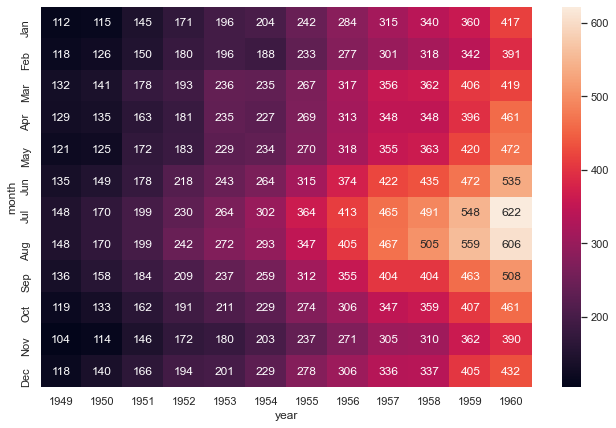

In [379]:
fig = plt.gcf()
fig.set_size_inches(11,7)
sns.heatmap(f1_.T,annot=True,fmt='d')
plt.show()

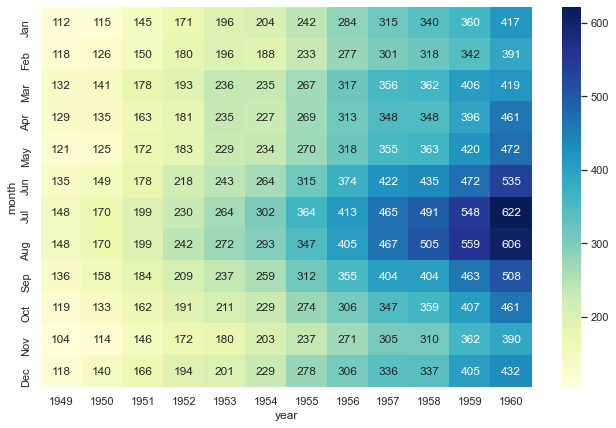

In [378]:
fig = plt.gcf()
fig.set_size_inches(11,7)
sns.heatmap(f1_.T,annot=True,fmt='d',cmap='YlGnBu')
plt.show()

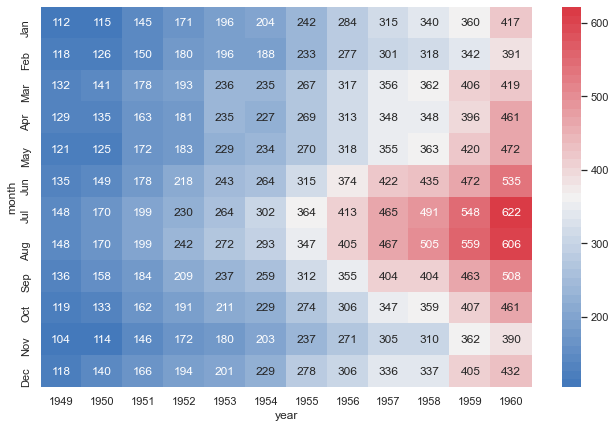

In [390]:
fig = plt.gcf()
fig.set_size_inches(11,7)
sns.heatmap(f1_.T,annot=True,fmt='d',cmap=sns.diverging_palette(250,10,n=45))
plt.show()

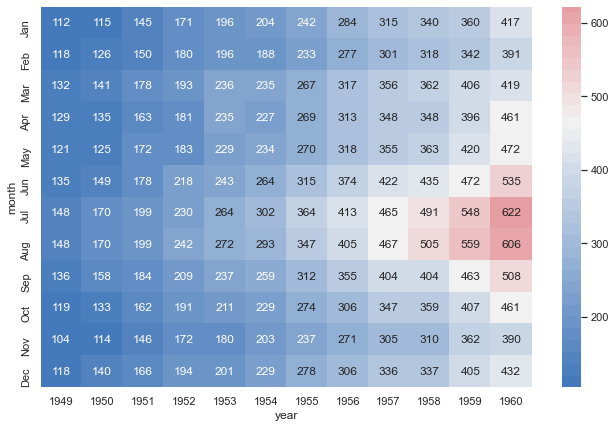

In [389]:
 fig = plt.gcf()
fig.set_size_inches(11,7)
sns.heatmap(f1_.T,annot=True,fmt='d',cmap=sns.diverging_palette(250,10,n=45), center=f1_.loc[1957,'Jul']) #July of 1957 is set to white color
plt.show()

# Task on open-ended visualisation

http://ml-india.org/datasets/

AMEO 2015 Dataset

In [392]:
df = pd.read_excel('datachallenge_cods2016/train.xlsx')

In [393]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
